In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../Resources')
import MyFunctionsV4 as mfs

In [52]:
match_link = '../CollectedData/match_list_92820.csv'
match_df = pd.read_csv(match_link)

In [53]:
match_df.columns

Index(['pull_time', 'game_id', 'console', 'winning_club', 'h_club',
       'h_club_id', 'h_goals', 'h_shots', 'h_shot_percent', 'h_passes_made',
       'h_pass_attempts', 'h_pass_percent', 'h_tackles_made',
       'h_tackle_attempts', 'h_tackle_percent', 'h_red_cards',
       'h_players_in_match', 'h_forward', 'h_midfielder', 'h_defender',
       'h_goalkeeper', 'h_any', 'h_season', 'h_round', 'opp_club',
       'opp_club_id', 'opp_goals', 'opp_shots', 'opp_shot_percent',
       'opp_passes_made', 'opp_pass_attempts', 'opp_pass_percent',
       'opp_tackles_made', 'opp_tackle_attempts', 'opp_tackle_percent',
       'opp_red_cards', 'opp_players_in_match', 'opp_forward',
       'opp_midfielder', 'opp_defender', 'opp_goalkeeper', 'opp_any',
       'opp_season', 'opp_round'],
      dtype='object')

In [54]:
match_df.head()

,pull_time,game_id,console,winning_club,h_club,h_club_id,h_goals,h_shots,h_shot_percent,h_passes_made,...,opp_tackle_percent,opp_red_cards,opp_players_in_match,opp_forward,opp_midfielder,opp_defender,opp_goalkeeper,opp_any,opp_season,opp_round
0,2023-04-22 17:07:08,1940614734,xboxone,Bang Average FC,Bang Average FC,1940614,2,12,0.17,129,...,0.15,0,6,1,5,0,0,0,34,8
1,2023-04-22 17:07:08,17404994102,xboxone,Bang Average FC,Bang Average FC,1940614,2,5,0.40,104,...,0.33,0,6,3,3,0,0,0,10,2
2,2023-04-22 17:07:08,1940614732,xboxone,Bang Average FC,Bang Average FC,1940614,3,8,0.38,146,...,0.30,0,6,2,2,2,0,0,170,10
3,2023-04-22 17:07:08,1940614731,xboxone,Bang Average FC,Bang Average FC,1940614,2,5,0.40,131,...,0.17,0,5,1,4,0,0,0,84,2
4,2023-04-22 17:07:08,2788144582,xboxone,Bang Average FC,Bang Average FC,1940614,2,7,0.29,123,...,0.31,0,2,1,1,0,0,0,58,2


In [55]:
opp_club_df = match_df[['winning_club','opp_club', 'opp_goals', 'opp_shots', 'opp_shot_percent',
       'opp_passes_made', 'opp_pass_attempts', 'opp_pass_percent',
       'opp_tackles_made', 'opp_tackle_attempts', 'opp_tackle_percent',
       'opp_red_cards', 'opp_players_in_match', 'opp_forward',
       'opp_midfielder', 'opp_defender', 'opp_goalkeeper', 'opp_any',
       'opp_season', 'opp_round']]

h_club_df = match_df[['winning_club','h_club', 'h_goals', 'h_shots', 'h_shot_percent', 'h_passes_made',
       'h_pass_attempts', 'h_pass_percent', 'h_tackles_made',
       'h_tackle_attempts', 'h_tackle_percent', 'h_red_cards',
       'h_players_in_match', 'h_forward', 'h_midfielder', 'h_defender',
       'h_goalkeeper', 'h_any', 'h_season', 'h_round']]

h_new_names = [col.replace("h_", "") for col in h_club_df.columns]
opp_new_names = [col.replace("opp_", "") for col in opp_club_df.columns]

h_club_df.columns = h_new_names
opp_club_df.columns = opp_new_names

In [56]:
match_club_df = pd.concat([h_club_df, opp_club_df], axis=0)
match_club_df.head()

,winning_club,club,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forward,midfielder,defender,goalkeeper,any,season,round
0,Bang Average FC,Bang Average FC,2,12,0.17,129,169,0.76,11,33,0.33,0,10,2,5,3,0,0,73,4
1,Bang Average FC,Bang Average FC,2,5,0.40,104,128,0.81,9,65,0.14,1,10,2,5,3,0,0,73,3
2,Bang Average FC,Bang Average FC,3,8,0.38,146,176,0.83,14,38,0.37,1,10,2,5,3,0,0,73,2
3,Bang Average FC,Bang Average FC,2,5,0.40,131,165,0.79,17,55,0.31,0,10,2,5,3,0,0,73,1
4,Bang Average FC,Bang Average FC,2,7,0.29,123,154,0.80,17,58,0.29,0,10,2,5,3,0,0,72,10


In [57]:
def win_loss_draw_assign(row):
    if row.winning_club == row.club:
        row['result'] = 1
    elif row.winning_club =='Draw':
        row['result'] = 2
    else:
        row['result'] = 0
    return row

In [58]:
match_club_df = match_club_df.apply(win_loss_draw_assign, axis=1)

In [59]:
match_club_df = match_club_df.drop(['winning_club', 'club'], axis=1)

In [60]:
print(match_club_df['shot_percent'].isnull().any())

False


In [61]:
match_club_df.dtypes

goals                 int64
shots                 int64
shot_percent        float64
passes_made           int64
pass_attempts         int64
pass_percent        float64
tackles_made          int64
tackle_attempts       int64
tackle_percent      float64
red_cards             int64
players_in_match      int64
forward               int64
midfielder            int64
defender              int64
goalkeeper            int64
any                   int64
season                int64
round                 int64
result                int64
dtype: object

In [64]:
match_club_df_results = match_club_df.groupby('result').mean()
match_club_df_results.shot_percent = match_club_df_results.goals / match_club_df_results.shots
match_club_df_results

,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forward,midfielder,defender,goalkeeper,any,season,round
result,,,,,,,,,,,,,,,,,,
0,1.049014,6.273876,0.167203,52.427544,68.394320,0.743162,4.666980,19.439648,0.214805,0.084448,3.747716,1.474127,1.531219,0.222235,0.168595,0.351540,34.759518,5.173431
1,3.319701,9.975650,0.332780,65.244285,82.963050,0.773221,6.130338,22.314211,0.268772,0.067247,4.131828,1.601550,1.797057,0.310617,0.073155,0.349449,39.024690,5.264283
2,1.736497,7.865704,0.220768,59.449635,77.132303,0.732557,5.144258,20.496597,0.227667,0.064527,3.912697,1.551744,1.655723,0.284103,0.104439,0.316688,36.058274,5.208908


In [65]:
match_club_df_results.columns

Index(['goals', 'shots', 'shot_percent', 'passes_made', 'pass_attempts',
       'pass_percent', 'tackles_made', 'tackle_attempts', 'tackle_percent',
       'red_cards', 'players_in_match', 'forward', 'midfielder', 'defender',
       'goalkeeper', 'any', 'season', 'round'],
      dtype='object')

In [67]:
match_players = match_club_df_results[['forward', 'midfielder', 'defender',
       'goalkeeper', 'any']]

In [70]:
match_players

,forward,midfielder,defender,goalkeeper,any
result,,,,,
0,1.474127,1.531219,0.222235,0.168595,0.351540
1,1.601550,1.797057,0.310617,0.073155,0.349449
2,1.551744,1.655723,0.284103,0.104439,0.316688


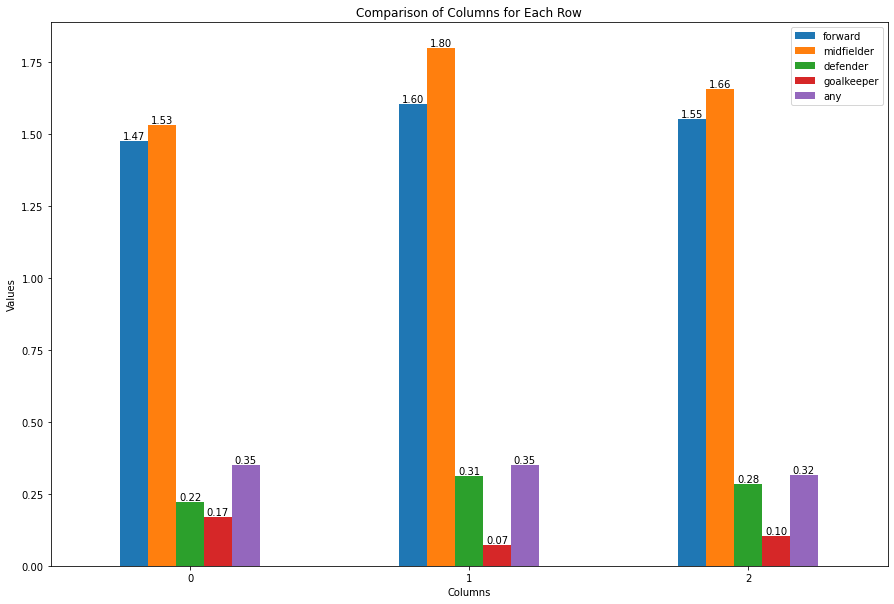

In [71]:
# plot bar chart
ax = match_players.plot.bar(figsize=(15, 10), rot=0)

# set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Comparison of Columns for Each Row')

# display values above each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{v:.2f}' for v in p.datavalues])

# show plot
plt.show()